In [24]:
using RDatasets
iris = dataset("datasets", "iris")
neuro = dataset("boot", "neuro");

In [25]:
using Plots

In [26]:
using Statistics

In [27]:
using CSV
using DataFrames

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris_data = CSV.File(download(url)) |> DataFrame


Row,5.1,3.5,1.4,0.2,Iris-setosa
,Float64,Float64,Float64,Float64,String15
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [28]:
size(iris)

(150, 5)

In [29]:
using MultivariateStats

In [30]:
iris_mat = Array( iris[:,1:4] )
iris_mat[1:8,:]

8×4 Matrix{Float64}:
 5.1  3.5  1.4  0.2
 4.9  3.0  1.4  0.2
 4.7  3.2  1.3  0.2
 4.6  3.1  1.5  0.2
 5.0  3.6  1.4  0.2
 5.4  3.9  1.7  0.4
 4.6  3.4  1.4  0.3
 5.0  3.4  1.5  0.2

In [31]:
var(iris_mat[:,1])

0.6856935123042507

In [32]:
cov(iris_mat[:,1],iris_mat[:,2])

-0.042434004474272924

In [33]:
cov(iris_mat)

4×4 Matrix{Float64}:
  0.685694  -0.042434   1.27432    0.516271
 -0.042434   0.189979  -0.329656  -0.121639
  1.27432   -0.329656   3.11628    1.29561
  0.516271  -0.121639   1.29561    0.581006

In [53]:
pca_model = fit(PCA, iris_mat'; maxoutdim=2);

In [54]:
pca_model.proj

4×2 Matrix{Float64}:
 -0.361387    0.656589
  0.0845225   0.730161
 -0.856671   -0.173373
 -0.358289   -0.075481

In [55]:
fieldnames(typeof(pca_model))

(:mean, :proj, :prinvars, :tprinvar, :tvar)

In [56]:
pca_model.prinvars

2-element Vector{Float64}:
 4.228241706034862
 0.24267074792863333

In [57]:
transformed_data = MultivariateStats.transform( pca_model,
                                                    iris_mat' )

2×150 Matrix{Float64}:
 2.68413    2.71414    2.88899   …  -1.76435    -1.90094   -1.39019
 0.319397  -0.177001  -0.144949      0.0788589   0.116628  -0.282661

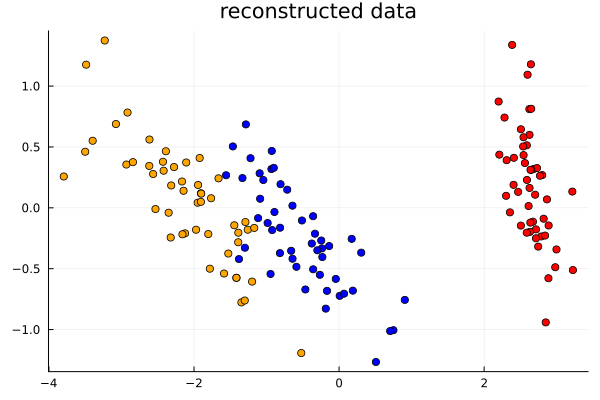

In [58]:
p = plot( transformed_data[1,:], transformed_data[2,:], seriestype=:scatter,
         title="reconstructed data", legend=false,
        markercolor=[fill(:red, 50); fill(:blue, 50); fill(:orange,50)],)
p

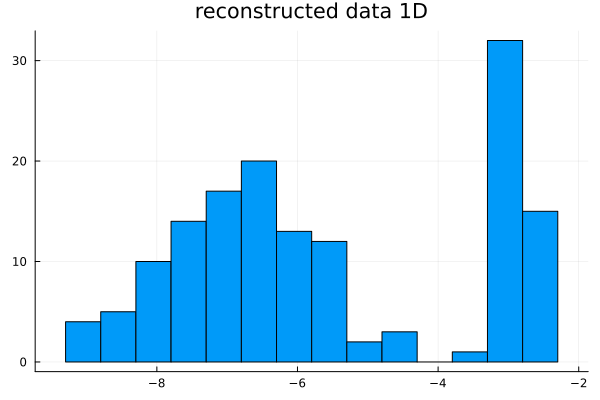

In [59]:
iris1D = iris_mat * pca_model.proj[:,1];
p = plot( iris1D, seriestype=:histogram,
    bins=minimum(iris1D):0.5:maximum(iris1D),
         title="reconstructed data 1D", legend=false)
    p